<a href="https://colab.research.google.com/github/ananya7rai/Dynamic-Object-Recognition-using-YOLOv3/blob/main/Dynamic_Object_Recognition_using_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from pathlib import Path
import random

# YOLO Configuration

In [17]:
#We'll do Paths first
weights_path = '/content/drive/MyDrive/yolov3.weights'
configuration_path = '/content/drive/MyDrive/yolov3.cfg'
labels_path = '/content/drive/MyDrive/coco.names'

In [18]:
#Now we'll load labels
labels = open(labels_path).read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [19]:
#Loading YOLO network
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

#Getting output layers
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]
print(layers_names_output)

#Setting parameters
probability_minimum = 0.5
threshold = 0.3

['yolo_82', 'yolo_94', 'yolo_106']


# YOLO Detection Function

In [20]:
def yolo_detection(image_path):
    image = cv2.imread(str(image_path))
    h, w = image.shape[:2]

    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB = True, crop = False)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)

    bounding_boxes = []
    confidences = []
    class_numbers = []

    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]

            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))

                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    return image, bounding_boxes, confidences, class_numbers, results

# Drawing bounding boxes function

In [21]:
def draw_bounding_boxes(image, bounding_boxes, confidences, class_numbers, results):
    if len(results) > 0:
        for i in results.flatten():
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

            colour_box_current = [int(j) for j in np.random.randint(0, 255, size=3)]

            cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                          colour_box_current, 2)

            text_box_current = f'{labels[int(class_numbers[i])]}: {confidences[i]:.4f}'

            cv2.putText(image, text_box_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, colour_box_current, 2)

    return image

# Processing and displaying images

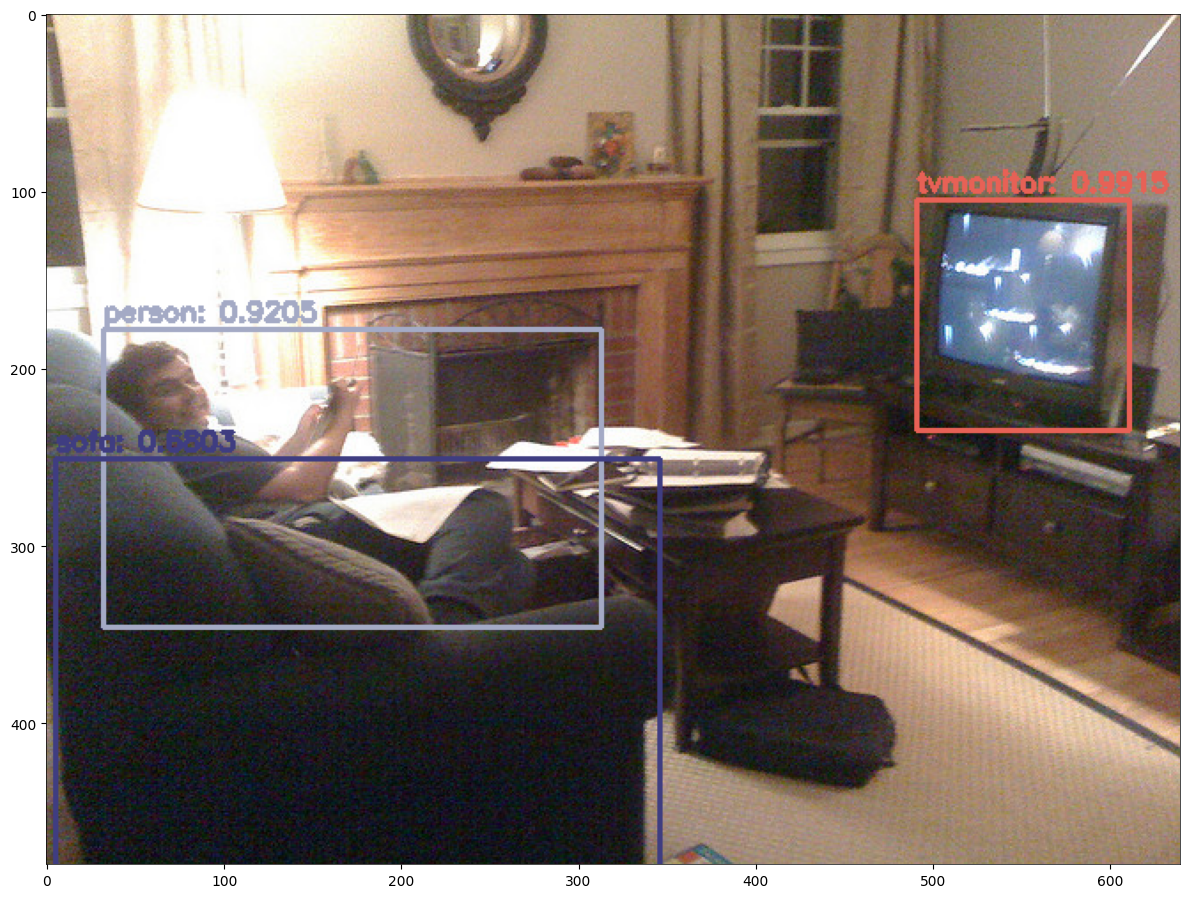

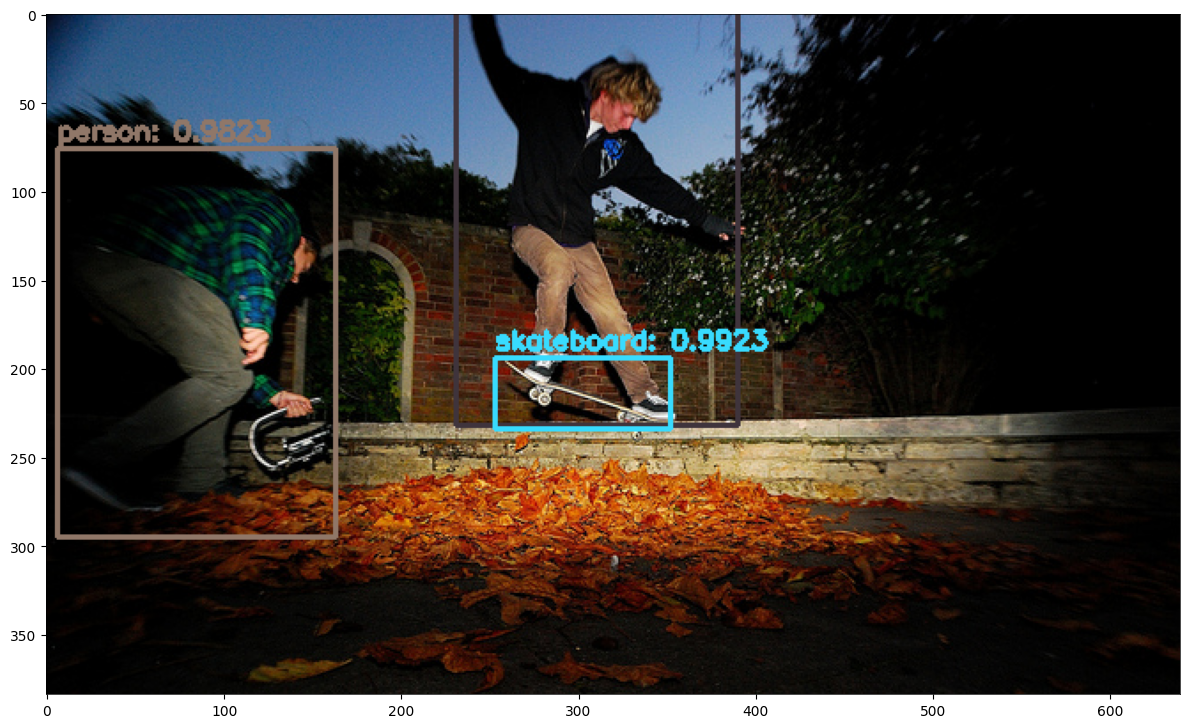

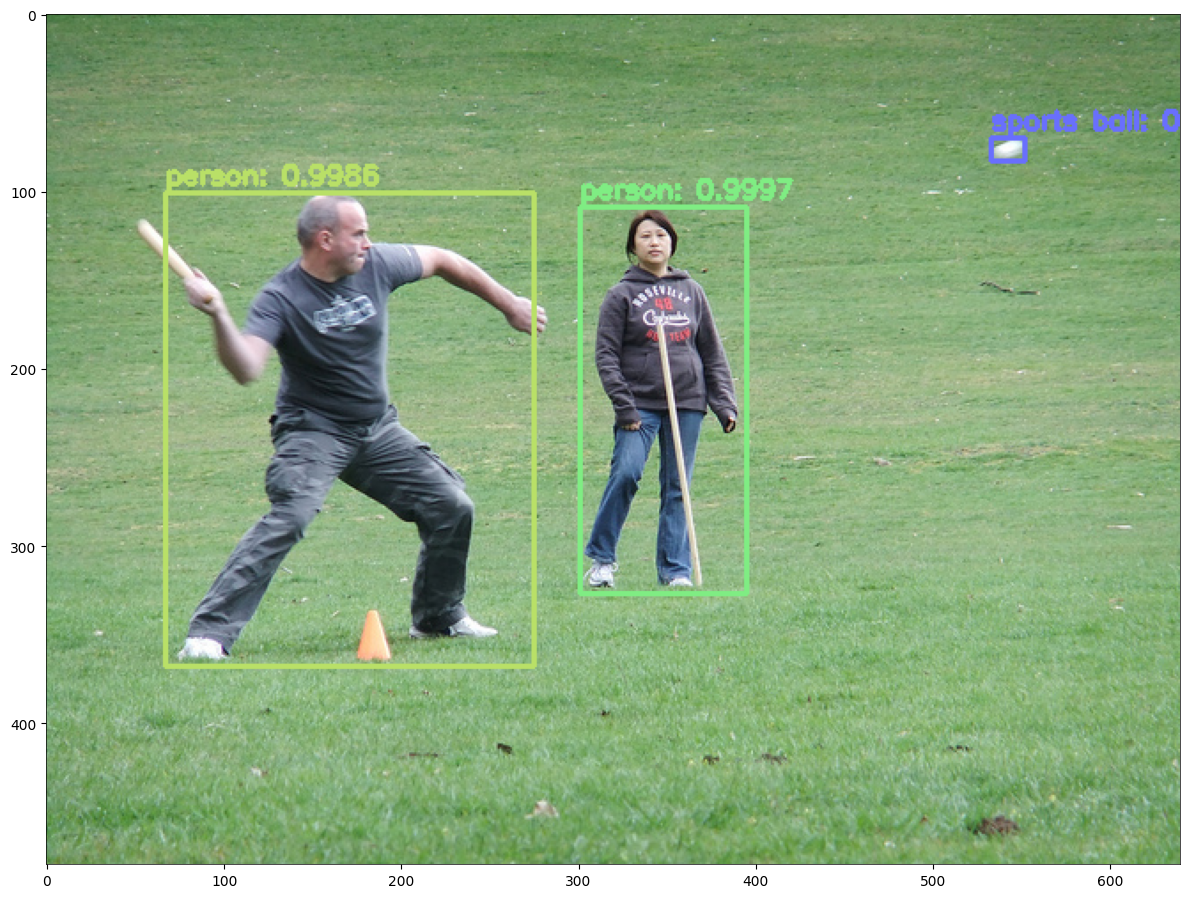

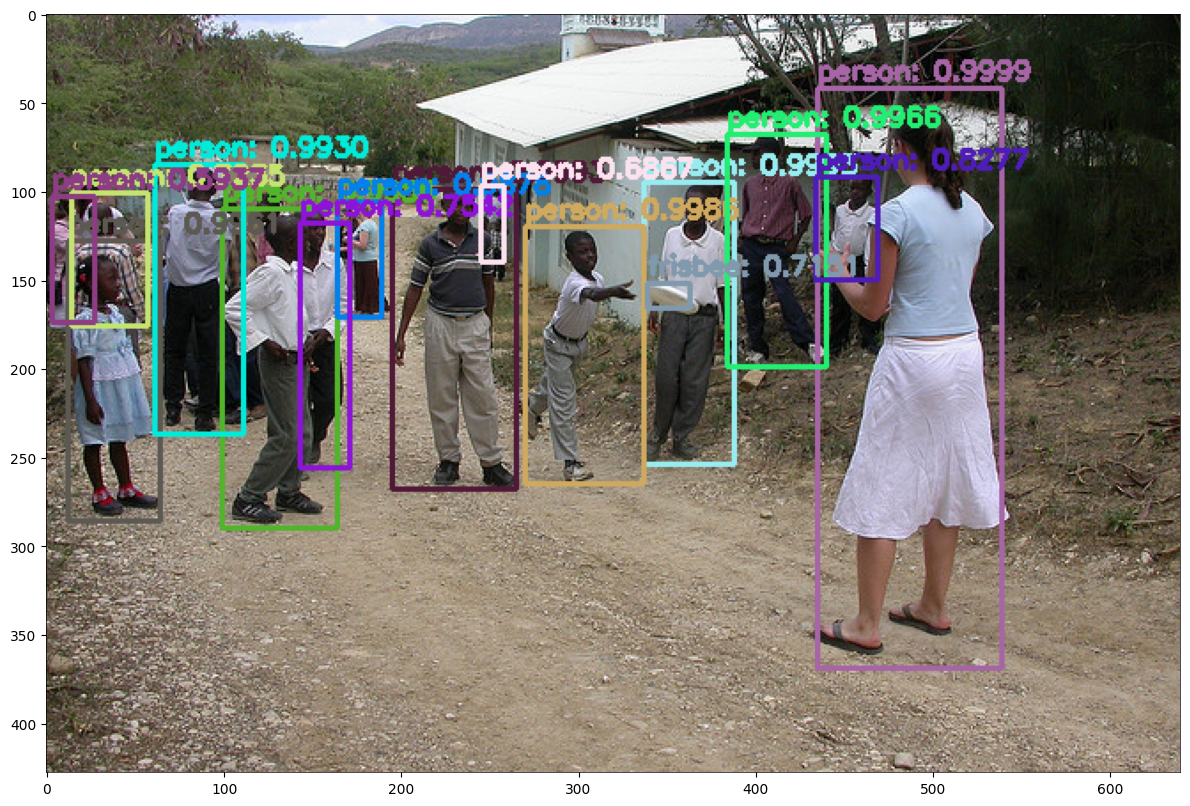

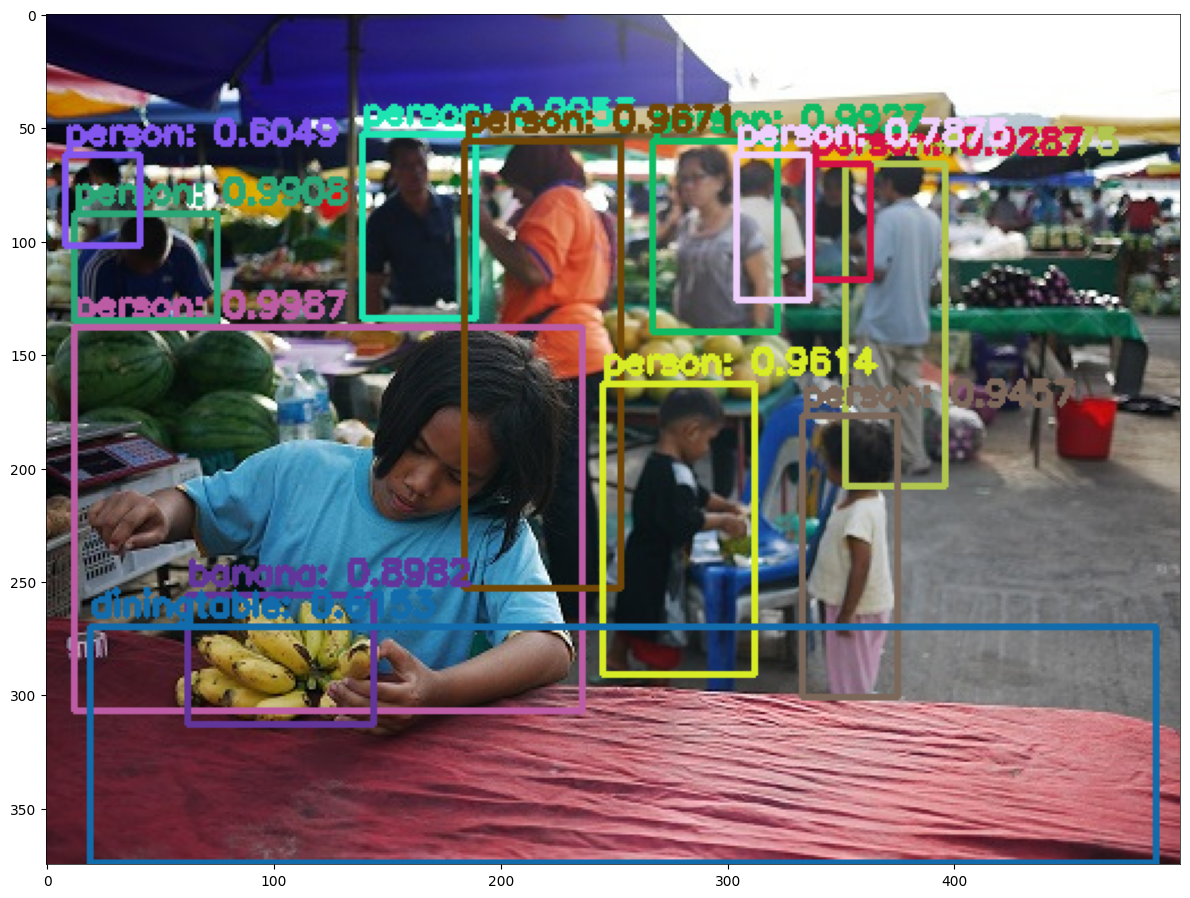

In [23]:
# Set path and get image files
image_path = Path("/content/drive/MyDrive/coco-2017")
image_files = list(image_path.glob("*.jpg")) + list(image_path.glob("*.jpeg"))

# Randomly select 5 images
selected_images = random.sample(image_files, min(5, len(image_files)))

# Process and display images one by one
for i, image_file in enumerate(selected_images, 1):
    # Perform YOLO detection
    image, bounding_boxes, confidences, class_numbers, results = yolo_detection(image_file)

    # Draw bounding boxes
    image_with_boxes = draw_bounding_boxes(image, bounding_boxes, confidences, class_numbers, results)

    # Create a figure for this image
    plt.figure(figsize=(12, 10))
    # Display the image
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))

    # Add a thin border around the image
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
